Kernel SVCは、カーネルを使用するSVM（サポートベクトル・マシン）に基づくクラス分類手法。

データは同様にXORとする。

In [1]:
# ライブラリのインポート--------------------------------
import numpy as np #numpyという行列などを扱うライブラリを利用
import pandas as pd #pandasというデータ分析ライブラリを利用
import matplotlib.pyplot as plt #プロット用のライブラリを利用
from sklearn import svm, metrics, preprocessing, cross_validation #機械学習用のライブラリを利用
from mlxtend.plotting import plot_decision_regions #学習結果をプロットする外部ライブラリを利用
from sklearn.kernel_approximation import RBFSampler #カーネル近似用の関数
from matplotlib.colors import ListedColormap #plot用

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# XORのデータを作成する(x=正、y=正)=0,(x=正、y=負)=1, 的な--------------
np.random.seed(0)
X_xor=np.random.randn(200,2) 
y_xor=np.logical_xor(X_xor[:,0]>0, X_xor[:,1]>0)
y_xor=np.where(y_xor,1,0)
pd.DataFrame(y_xor)  #この行を実行するとデータが見れる

,0
0,0
1,0
2,1
3,1
4,1
5,0
6,0
7,0
8,1
9,1


<function matplotlib.pyplot.show>

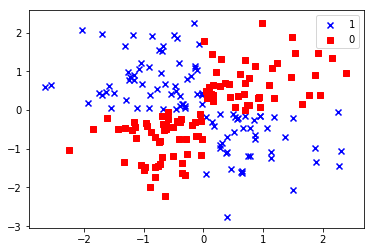

In [3]:
# プロットしてみる------------------------------------------------------
%matplotlib inline
 
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==0, 0], X_xor[y_xor==0, 1], c='r', marker='s', label='0')
plt.legend(loc='best')
plt.show

In [4]:
# データの整形-------------------------------------------------------
X_std=X_xor
z=y_xor

# 正規化
sc = preprocessing.StandardScaler()
sc.fit(X_std)
X_std = sc.transform(X_std)

識別器としてSVCを使用する。

カーネルの種類としてはrbfカーネル（ガウスカーネル）を使用している。

ガウスカーネルの係数gammaはdefaultでは1/次元数であり、今回は1/2としている。

損失の大きさをどれくらい考慮するかを決めるパラメータCは1.0。
またクラスごとのデータ数の違いを補正（weight=’balanced’）。

乱数のシードは0に固定。

In [5]:
# 機械学習で分類する---------------------------------------------------
clf_result=svm.SVC(kernel='rbf', gamma=1/2 , C=1.0,class_weight='balanced', random_state=0) #loss='squared_hinge' #loss="hinge", loss="log"
clf_result.fit(X_std, z)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
# K分割交差検証（cross validation）で性能を評価する---------------------
scores=cross_validation.cross_val_score(clf_result, X_std, z, cv=10)
print("平均正解率 = ", scores.mean())
print("正解率の標準偏差 = ", scores.std())

平均正解率 =  0.9449498746867168
正解率の標準偏差 =  0.0472709892264494


正答率 =  0.85


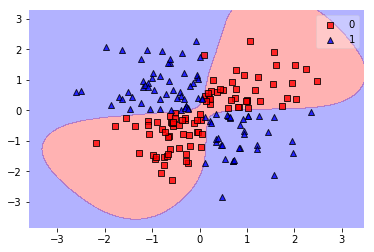

In [7]:
# トレーニングデータとテストデータに分けて実行してみる------------------
X_train, X_test, train_label, test_label=cross_validation.train_test_split(X_std,z, test_size=0.1, random_state=0)
clf_result.fit(X_train, train_label)
#正答率を求める
pre=clf_result.predict(X_test)
ac_score=metrics.accuracy_score(test_label,pre)
print("正答率 = ",ac_score)
#plotする
X_train_plot=np.vstack(X_train)
train_label_plot=np.hstack(train_label)
X_test_plot=np.vstack(X_test)
test_label_plot=np.hstack(test_label)
plot_decision_regions(X_train_plot, train_label_plot, clf=clf_result, res=0.01) #学習データをプロット

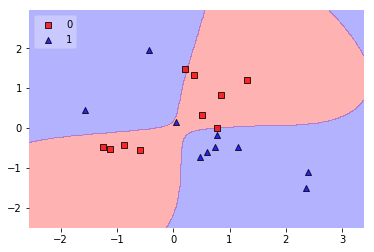

In [8]:
plot_decision_regions(X_test_plot, test_label_plot, clf=clf_result, res=0.01, legend=2) #テストデータをプロット

In [9]:
# 識別平面の式を手に入れる--------------------------------
print(clf_result.intercept_)
print(clf_result.dual_coef_ )  #coef[0]*x+coef[1]*y+intercept=0

[0.23942975]
[[-1.01123596 -1.01123596 -0.6520465  -1.01123596 -1.01123596 -1.01123596
  -1.01123596 -1.01123596 -1.01123596 -1.01123596 -1.01123596 -1.01123596
  -1.01123596 -1.01123596 -1.01123596 -1.01123596 -0.07756403 -0.5448206
  -0.05186795 -1.01123596 -1.01123596 -1.01123596 -1.01123596 -1.01123596
  -1.01123596 -1.01123596 -1.01123596 -1.00308126 -1.01123596 -0.40080223
  -1.01123596 -1.01123596 -1.01123596 -1.01123596 -1.01123596 -1.01123596
  -1.01123596 -1.01123596 -1.01123596 -1.01123596 -1.01123596 -1.01123596
   0.98901099  0.98901099  0.98901099  0.98901099  0.98901099  0.68668994
   0.98901099  0.98901099  0.98901099  0.74080807  0.98901099  0.98901099
   0.98901099  0.98901099  0.98901099  0.98901099  0.98901099  0.98901099
   0.98901099  0.98901099  0.12476136  0.98901099  0.98901099  0.98901099
   0.98901099  0.98901099  0.98901099  0.98901099  0.98901099  0.98901099
   0.98901099  0.98901099  0.98901099  0.98901099  0.98901099  0.98901099
   0.98901099  0.98901099 

#### Kernel SVCとは
 - [Kernel SVC:sklearn](http://scikit-learn.org/stable/modules/svm.html#classification)
 - [Kernel SVC:sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

基本的に非線形識別式のSVCとの認識で良い